In [1]:
import matplotlib.pyplot as plt
import json, os, subprocess, shapely
import rasterio as rio
from rasterio.plot import show
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='arial')
# saveDir = '\\output\\'
saveDir = os.getcwd()+'\\output\\TeamMeeting_031620\\'
mapDir = 'D:\\maps\\'
from matplotlib.colors import ListedColormap

In [2]:
##### Import liquefaction susceptibility map for Bay Area
##### https://pubs.usgs.gov/of/2006/1037/
# df_susc = gpd.GeoDataFrame.from_file('C:\\Users\\BarryZheng\\Downloads\\of06-1037_4b.shp\\'+'sfq2py.shp')
df_liq_susc = gpd.GeoDataFrame.from_file(os.getcwd()+'\\of06-1037_4b.shp\\sfq2py.shp')
liq_susc_dict = {'VL': 'very low',
                 'L': 'low',
                 'M': 'low',
                 'H': 'low',
                 'L': 'low',
                 'W': 'water',
                 'NM': 'not mapped'}
cmap_liq_susc_dict = {'VH': np.minimum(np.divide([238,28,37],255),1),
                      'H': np.minimum(np.divide([253,178,21],255),1),
                      'M': np.minimum(np.divide([255,241,0],255),1),
                      'L': np.minimum(np.divide([162,204,57],255),1),
                      'VL': np.minimum(np.divide([243,243,244],255),1),
                      'W': np.minimum(np.divide([235,247,253],255),1),
                      'NM': 'None'}
cmap_arr = [cmap_liq_susc_dict.get(i,None) for i in df_liq_susc['LIQ'].values]
df_liq_susc['color'] = cmap_arr

In [3]:
rup_ind = '606'
# input_json = os.getcwd() + '/output/sim_s5_fp_ucerf3_0_606.json'
input_json = os.getcwd() + '/output/sim_s5_fp_ucerf3_0_' + rup_ind + '.json'
with open(input_json, 'r') as f:
    json1_fp = json.load(f)
# input_json = os.getcwd() + '/output/sim_s5_fn_ucerf3_0_606.json'
input_json = os.getcwd() + '/output/sim_s5_fn_ucerf3_0_' + rup_ind + '.json'
with open(input_json, 'r') as f:
    json1_fn = json.load(f)

In [4]:
siteList1_fp = [[json1_fp['Site']['SiteList'][i]['Location']['Longitude'],
                 json1_fp['Site']['SiteList'][i]['Location']['Latitude']] for i in range(len(json1_fp['Site']['SiteList']))]
siteList1_fn = [[json1_fn['Site']['SiteList'][i]['Location']['Longitude'],
                 json1_fn['Site']['SiteList'][i]['Location']['Latitude']] for i in range(len(json1_fn['Site']['SiteList']))]
siteList1_fp = np.transpose(siteList1_fp)
siteList1_fn = np.transpose(siteList1_fn)

In [5]:
siteList1_fp[0]

array([-122.3064072, -122.2867916, -122.267176 , -122.2475604,
       -122.2279448])

In [6]:
pt1_fp = [37.924836, -122.316215]
pt2_fp = [37.802175, -122.218137]
pt1_fn = [37.83284025, -122.2426565]
pt2_fn = [37.93091825, -122.1199955]

In [7]:
rup_scen1 = np.transpose(np.loadtxt('rup_0_' + rup_ind + '.txt'))

In [10]:
##### Import depth to groundwater map, converted to WGS84 coordinate system and downsampled by a factor of 4
##### https://datadryad.org/stash/dataset/doi:10.6078/D1W01Q
ras_z2gw = rio.open(os.getcwd() + '\\MinDTWmodel_meters_wgs84_ds4.tif')
data_z2gw = ras_z2gw.read(1)

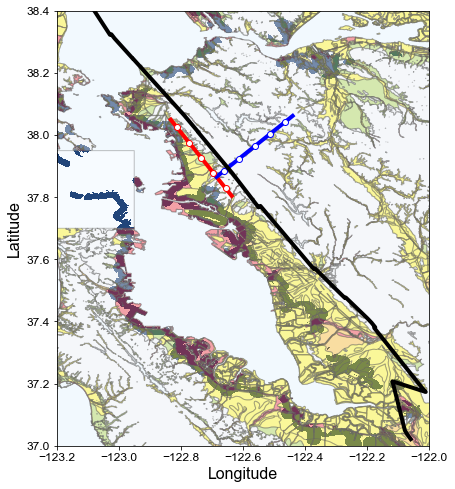

In [11]:
nx = 1
ny = 1
figsize = (16,8)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
##
# df_liq_susc.plot(cmap='Pastel1',ec=[.7,.7,.7])
# show(data_ls_susc, ax=ax, transform=ras_ls_susc.transform, alpha=1, cmap='YlGn',
#      title='liquefaction susceptibility (ylw,grn) and depth to groundwater (blue)')
# df_liq_susc.plot(ax=ax, cmap='Pastel1',ec=[.7,.7,.7], alpha=0.4)
df_liq_susc.plot(ax=ax, color=df_liq_susc['color'], ec=[0.4,0.4,0.4], alpha=0.4, legend=True)
show(data_z2gw, ax=ax, transform=ras_z2gw.transform, alpha=0.9, cmap='Blues')
ax.plot([pt1_fp[1],pt2_fp[1]],[pt1_fp[0],pt2_fp[0]],'-r',linewidth=4)
ax.plot([pt1_fn[1],pt2_fn[1]],[pt1_fn[0],pt2_fn[0]],'-b',linewidth=4)
# for i in range(nSites):
ax.plot(siteList1_fp[0],siteList1_fp[1],'o',mec='r',mfc='w')
ax.plot(siteList1_fn[0],siteList1_fn[1],'o',mec='b',mfc='w')
ax.plot(rup_scen1[0],rup_scen1[1],'-k',linewidth=4)
ax.set_xlabel('Longitude',fontsize=16,fontname=fontname)
ax.set_ylabel('Latitude',fontsize=16,fontname=fontname)
ax.set_xlim([-122.5,-121.9])
ax.set_ylim([37.4,38.1])
ax.tick_params(labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(),fontname=fontname)
ax.set_yticklabels(ax.get_yticklabels(),fontname=fontname)
# plt.savefig('0_108_problem.png',dpi=100,format='png',quality=100,bbox_inches='tight')
# plt.savefig(saveDir+'0_' + rup_ind + '_problem.png',dpi=100,format='png',quality=100,bbox_inches='tight')
plt.show()

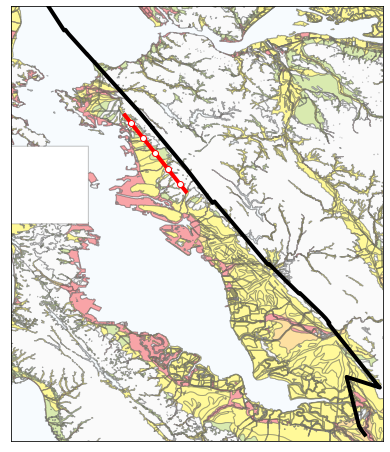

In [13]:
nx = 1
ny = 1
figsize = (16,8)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
##
# df_liq_susc.plot(cmap='Pastel1',ec=[.7,.7,.7])
# show(data_ls_susc, ax=ax, transform=ras_ls_susc.transform, alpha=1, cmap='YlGn',
#      title='liquefaction susceptibility (ylw,grn) and depth to groundwater (blue)')
# df_liq_susc.plot(ax=ax, cmap='Pastel1',ec=[.7,.7,.7], alpha=0.4)
df_liq_susc.plot(ax=ax, color=df_liq_susc['color'], ec=[0.4,0.4,0.4], alpha=0.4, legend=True)
# show(data_z2gw, ax=ax, transform=ras_z2gw.transform, alpha=0.9, cmap='Blues')
ax.plot([pt1_fp[1],pt2_fp[1]],[pt1_fp[0],pt2_fp[0]],'-r',linewidth=4)
# ax.plot([pt1_fn[1],pt2_fn[1]],[pt1_fn[0],pt2_fn[0]],'-b',linewidth=4)
# for i in range(nSites):
ax.plot(siteList1_fp[0],siteList1_fp[1],'o',mec='r',mfc='w')
# ax.plot(siteList1_fn[0],siteList1_fn[1],'o',mec='b',mfc='w')
ax.plot(rup_scen1[0],rup_scen1[1],'-k',linewidth=4)
# ax.set_xlabel('Longitude',fontsize=16,fontname=fontname)
# ax.set_ylabel('Latitude',fontsize=16,fontname=fontname)
ax.set_xlim([-122.5,-121.9])
ax.set_ylim([37.4,38.1])
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
# ax.tick_params(labelsize=12)
# ax.set_xticklabels(ax.get_xticklabels(),fontname=fontname)
# ax.set_yticklabels(ax.get_yticklabels(),fontname=fontname)
# plt.savefig('0_108_problem.png',dpi=100,format='png',quality=100,bbox_inches='tight')
plt.savefig(saveDir+'0_' + rup_ind + '_fp_only.png',dpi=100,format='png',quality=100,bbox_inches='tight')
# plt.savefig('0_' + rup_ind + '_fp_fn.png',dpi=100,format='png',quality=100,bbox_inches='tight')
plt.show()

In [14]:
rup_scen2 = np.transpose(np.loadtxt('rup_0_83.txt'))
rup_scen3 = np.transpose(np.loadtxt('rup_0_108.txt'))
rup_scen4 = np.transpose(np.loadtxt('rup_0_626.txt'))

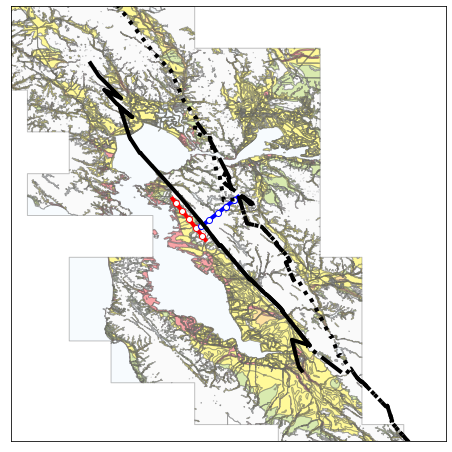

In [19]:
nx = 1
ny = 1
figsize = (16,8)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
##
# df_liq_susc.plot(cmap='Pastel1',ec=[.7,.7,.7])
# show(data_ls_susc, ax=ax, transform=ras_ls_susc.transform, alpha=1, cmap='YlGn',
#      title='liquefaction susceptibility (ylw,grn) and depth to groundwater (blue)')
# df_liq_susc.plot(ax=ax, cmap='Pastel1',ec=[.7,.7,.7], alpha=0.4)
df_liq_susc.plot(ax=ax, color=df_liq_susc['color'], ec=[0.4,0.4,0.4], alpha=0.4, legend=True)
# show(data_z2gw, ax=ax, transform=ras_z2gw.transform, alpha=0.9, cmap='Blues')
ax.plot([pt1_fp[1],pt2_fp[1]],[pt1_fp[0],pt2_fp[0]],'-r',linewidth=4)
ax.plot([pt1_fn[1],pt2_fn[1]],[pt1_fn[0],pt2_fn[0]],'-b',linewidth=4)
# for i in range(nSites):
ax.plot(siteList1_fp[0],siteList1_fp[1],'o',mec='r',mfc='w')
ax.plot(siteList1_fn[0],siteList1_fn[1],'o',mec='b',mfc='w')
ax.plot(rup_scen1[0],rup_scen1[1],'-k',linewidth=4)
ax.plot(rup_scen2[0],rup_scen2[1],'--k',linewidth=4)
ax.plot(rup_scen3[0],rup_scen3[1],':k',linewidth=4)
ax.plot(rup_scen4[0],rup_scen4[1],'-.k',linewidth=4)
# ax.set_xlabel('Longitude',fontsize=16,fontname=fontname)
# ax.set_ylabel('Latitude',fontsize=16,fontname=fontname)
# ax.set_xlim([-122.5,-121.9])
# ax.set_ylim([37.4,38.1])
ax.set_xlim([-122.8,-121.5])
ax.set_ylim([37.2,38.5])
# ax.tick_params(labelsize=12)
# ax.set_xticklabels(ax.get_xticklabels(),fontname=fontname)
# ax.set_yticklabels(ax.get_yticklabels(),fontname=fontname)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
# plt.savefig('0_108_problem.png',dpi=100,format='png',quality=100,bbox_inches='tight')
plt.savefig(saveDir+'faults_all_noaxes.png',dpi=100,format='png',quality=100,bbox_inches='tight')
plt.show()

In [23]:
##### Import liquefaction susceptibility map for Bay Area
##### https://pubs.usgs.gov/of/2006/1037/
# df_susc = gpd.GeoDataFrame.from_file('C:\\Users\\BarryZheng\\Downloads\\of06-1037_4b.shp\\'+'sfq2py.shp')
df_geo = gpd.GeoDataFrame.from_file(os.getcwd()+'\\GDM_002_GMC_750k_v2_GIS\\shapefiles\\GMC_geo_poly.shp')
df_geo = df_geo.to_crs("EPSG:4326")

In [18]:
# input_json = os.getcwd() + '/geo_poly.json'
# with open(input_json, 'r') as f:
#     json_geo_poly = json.load(f)

In [20]:
# json_geo_poly['spatialReference']

{'wkid': 3310, 'latestWkid': 3310}

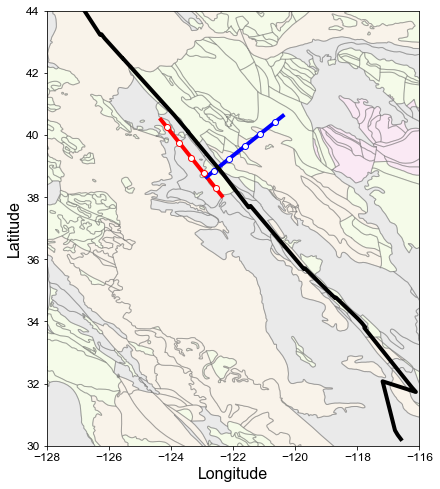

In [25]:
nx = 1
ny = 1
figsize = (16,8)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
##
# df_liq_susc.plot(cmap='Pastel1',ec=[.7,.7,.7])
# show(data_ls_susc, ax=ax, transform=ras_ls_susc.transform, alpha=1, cmap='YlGn',
#      title='liquefaction susceptibility (ylw,grn) and depth to groundwater (blue)')
# df_liq_susc.plot(ax=ax, cmap='Pastel1',ec=[.7,.7,.7], alpha=0.4)
df_geo.plot(ax=ax, cmap='Pastel2', ec=[0.4,0.4,0.4], alpha=0.4, legend=True)
# show(data_z2gw, ax=ax, transform=ras_z2gw.transform, alpha=0.9, cmap='Blues')
ax.plot([pt1_fp[1],pt2_fp[1]],[pt1_fp[0],pt2_fp[0]],'-r',linewidth=4)
ax.plot([pt1_fn[1],pt2_fn[1]],[pt1_fn[0],pt2_fn[0]],'-b',linewidth=4)
# for i in range(nSites):
ax.plot(siteList1_fp[0],siteList1_fp[1],'o',mec='r',mfc='w')
ax.plot(siteList1_fn[0],siteList1_fn[1],'o',mec='b',mfc='w')
ax.plot(rup_scen1[0],rup_scen1[1],'-k',linewidth=4)
ax.set_xlabel('Longitude',fontsize=16,fontname=fontname)
ax.set_ylabel('Latitude',fontsize=16,fontname=fontname)
ax.set_xlim([-122.5,-121.9])
ax.set_ylim([37.4,38.1])
ax.tick_params(labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(),fontname=fontname)
ax.set_yticklabels(ax.get_yticklabels(),fontname=fontname)
# plt.savefig(saveDir+'0_108_problem.png',dpi=100,format='png',quality=100,bbox_inches='tight')
# plt.savefig(saveDir+'0_' + rup_ind + '_problem.png',dpi=100,format='png',quality=100,bbox_inches='tight')
plt.show()

In [ ]:
        ## Liquefaction susceptibility
        liq_susc = []
        for i in range(nDiv_line):
            # Setting the coordinates for the point
            coord2search = shapely.geometry.Point((siteList[i][1],siteList[i][0])) # Longitude & Latitude
            # Searching for the geometry that intersects the point. Returning the index for the appropriate polygon.
            liq_susc.append(df_liq_susc[df_liq_susc.geometry.intersects(coord2search)].LIQ.values[0])
        liq_susc = [liq_susc_dict.get(i,None) for i in liq_susc]

In [12]:
prob_liq = np.genfromtxt(os.getcwd()+'/zhu_etal_prob_liq.txt',delimiter=',')
liq_susc_norm = np.genfromtxt(os.getcwd()+'/zhu_etal_liq_susc_norm.txt',delimiter=',')
xarr = np.loadtxt(os.getcwd()+'/zhu_etal_long_arr.txt',delimiter=',')
yarr = np.loadtxt(os.getcwd()+'/zhu_etal_lat_arr.txt',delimiter=',')

In [13]:
##
levels_pliq=[0,0.2,0.3,0.5,1]
levels_pliq_norm = np.linspace(0,1,len(levels_pliq))
# prob_liq_norm = 
prob_liq_norm = np.interp(prob_liq,levels_pliq,levels_pliq_norm)

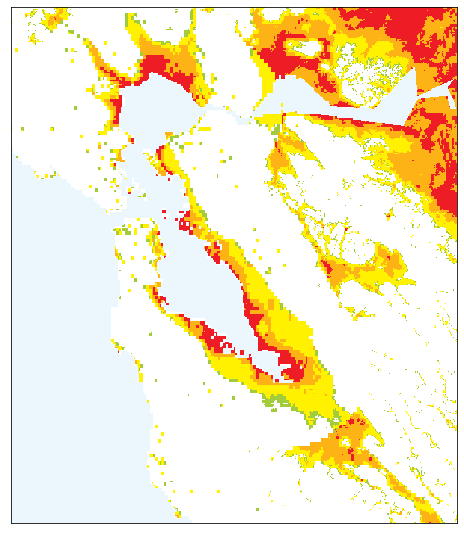

In [14]:
nx = 1
ny = 1
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
##
figsize = (8,9.5)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
##
colors_prob_liq = np.divide([[219,219,219],
                             [255,249,161],
                             [253,192, 77],
                             [229, 86, 88]],255)
colors_liq_susc = np.divide([[255,255,255],
                             [162,204,57],
                             [255,241,0],
                             [253,178,21],
                             [238,28,37]],255)
cmap_pliq = ListedColormap(colors_prob_liq, name='colors_prob_liq')
cmap_susc = ListedColormap(colors_liq_susc, name='colors_liq_susc')
# ax.pcolormesh(xarr,yarr,prob_liq_norm,cmap=cmap_pliq)
ax.pcolormesh(xarr,yarr,liq_susc_norm,cmap=cmap_susc)
##
# ax.set_xlim(xbounds)
# ax.set_ylim(ybounds)
# ax.set_xlabel('Longitude',fontsize=16,fontname=fontname)
# ax.set_ylabel('Latitude',fontsize=16,fontname=fontname)
# ax.set_xlim([-122.5,-121.9])
# ax.set_ylim([37.4,38.1])
ax.set_xlim([-122.8,-121.55])
ax.set_ylim([37.1,38.3])
ax.tick_params(labelsize=12)
# bg_fc = np.divide([168,218,214],255)
bg_fc = np.divide([235,247,253],255)
ax.set_facecolor(bg_fc)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
# plt.savefig('0_108_problem.png',dpi=100,format='png',quality=100,bbox_inches='tight')
plt.savefig(saveDir+'zhu_etal_liq_susc.png',dpi=100,format='png',quality=100,bbox_inches='tight')
##
plt.show()

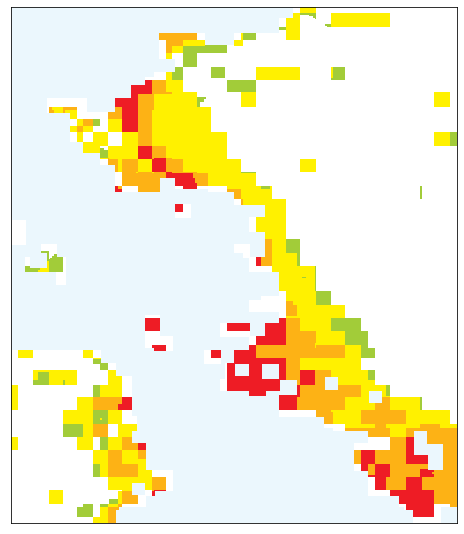

In [15]:
nx = 1
ny = 1
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
##
figsize = (8,9.5)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
##
colors_prob_liq = np.divide([[219,219,219],
                             [255,249,161],
                             [253,192, 77],
                             [229, 86, 88]],255)
colors_liq_susc = np.divide([[255,255,255],
                             [162,204,57],
                             [255,241,0],
                             [253,178,21],
                             [238,28,37]],255)
cmap_pliq = ListedColormap(colors_prob_liq, name='colors_prob_liq')
cmap_susc = ListedColormap(colors_liq_susc, name='colors_liq_susc')
# ax.pcolormesh(xarr,yarr,prob_liq_norm,cmap=cmap_pliq)
ax.pcolormesh(xarr,yarr,liq_susc_norm,cmap=cmap_susc)
##
# ax.set_xlim(xbounds)
# ax.set_ylim(ybounds)
# ax.set_xlabel('Longitude',fontsize=16,fontname=fontname)
# ax.set_ylabel('Latitude',fontsize=16,fontname=fontname)
ax.set_xlim([-122.45,-122.2]) # zoomed into alameda
ax.set_ylim([37.7,38.025]) # zoomed into alameda
# ax.set_xlim([-122.8,-121.55]) # bay area
# ax.set_ylim([37.1,38.3]) # bay area
ax.tick_params(labelsize=12)
# bg_fc = np.divide([168,218,214],255)
bg_fc = np.divide([235,247,253],255)
ax.set_facecolor(bg_fc)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
# plt.savefig('0_108_problem.png',dpi=100,format='png',quality=100,bbox_inches='tight')
plt.savefig(saveDir+'zhu_etal_liq_susc_zoomed.png',dpi=100,format='png',quality=100,bbox_inches='tight')
##
plt.show()

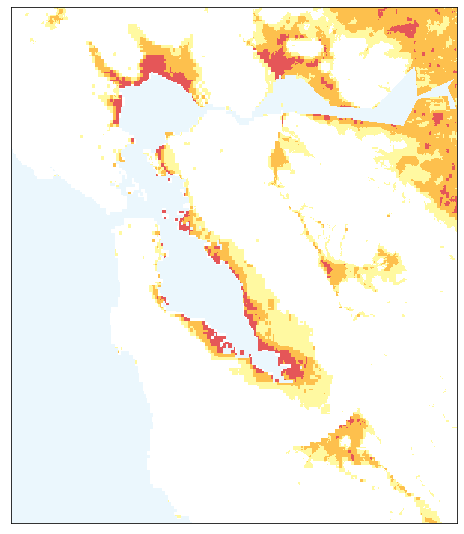

In [16]:
nx = 1
ny = 1
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
##
figsize = (8,9.5)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
##
colors_prob_liq = np.divide([[255,255,255],
                             [255,249,161],
                             [253,192, 77],
                             [229, 86, 88]],255)
colors_liq_susc = np.divide([[243,243,244],
                             [162,204,57],
                             [255,241,0],
                             [253,178,21],
                             [238,28,37]],255)
cmap_pliq = ListedColormap(colors_prob_liq, name='colors_prob_liq')
cmap_susc = ListedColormap(colors_liq_susc, name='colors_liq_susc')
ax.pcolormesh(xarr,yarr,prob_liq_norm,cmap=cmap_pliq)
##
# ax.set_xlim(xbounds)
# ax.set_ylim(ybounds)
# ax.set_xlabel('Longitude',fontsize=16,fontname=fontname)
# ax.set_ylabel('Latitude',fontsize=16,fontname=fontname)
# ax.set_xlim([-122.5,-121.9])
# ax.set_ylim([37.4,38.1])
ax.set_xlim([-122.8,-121.55])
ax.set_ylim([37.1,38.3])
ax.tick_params(labelsize=12)
# bg_fc = np.divide([168,218,214],255)
bg_fc = np.divide([235,247,253],255)
ax.set_facecolor(bg_fc)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
# plt.savefig('0_108_problem.png',dpi=100,format='png',quality=100,bbox_inches='tight')
plt.savefig(saveDir+'zhu_etal_prob_liq.png',dpi=100,format='png',quality=100,bbox_inches='tight')
##
plt.show()

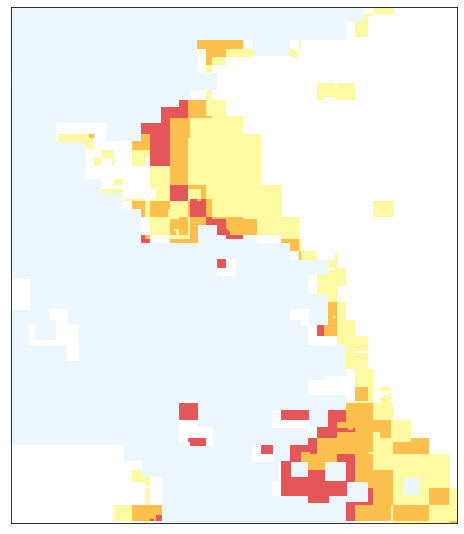

In [17]:
nx = 1
ny = 1
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
##
figsize = (8,9.5)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
##
colors_prob_liq = np.divide([[255,255,255],
                             [255,249,161],
                             [253,192, 77],
                             [229, 86, 88]],255)
colors_liq_susc = np.divide([[243,243,244],
                             [162,204,57],
                             [255,241,0],
                             [253,178,21],
                             [238,28,37]],255)
cmap_pliq = ListedColormap(colors_prob_liq, name='colors_prob_liq')
cmap_susc = ListedColormap(colors_liq_susc, name='colors_liq_susc')
ax.pcolormesh(xarr,yarr,prob_liq_norm,cmap=cmap_pliq)
##
# ax.set_xlim(xbounds)
# ax.set_ylim(ybounds)
# ax.set_xlabel('Longitude',fontsize=16,fontname=fontname)
# ax.set_ylabel('Latitude',fontsize=16,fontname=fontname)
ax.set_xlim([-122.45,-122.25]) # zoomed into alameda
ax.set_ylim([37.77,38.025]) # zoomed into alameda
# ax.set_xlim([-122.8,-121.55]) # bay area
# ax.set_ylim([37.1,38.3]) # bay area
ax.tick_params(labelsize=12)
# bg_fc = np.divide([168,218,214],255)
bg_fc = np.divide([235,247,253],255)
ax.set_facecolor(bg_fc)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
# plt.savefig('0_108_problem.png',dpi=100,format='png',quality=100,bbox_inches='tight')
plt.savefig(saveDir+'zhu_etal_prob_liq_zoomed.png',dpi=100,format='png',quality=100,bbox_inches='tight')
##
plt.show()